## 모두를 위한 머신러닝/딥러닝 강의
김성훈 교수님의 모두를 위한 머신러닝/딥러닝 강의 중 lab 강의 코드입니다.
## Lab3 Minimizing Cost

### Visualize cost function (below)
$$cost = \frac{1}{m} \sum\limits_{i=1}^{m}(wx_i - y_i)^2 $$ 

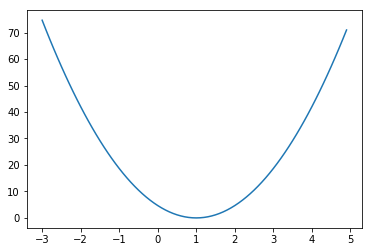

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt
tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Variable for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict = {W : curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

### Gradient descent (without Optimizer)
$$ \frac{\partial cost}{\partial W} = \frac{2}{m} \sum\limits_{i=1}^{m} (wx_i - y_i)x_i$$  
$$ W \leftarrow W - \alpha \frac{2}{m} \sum\limits_{i=1}^{m} (wx_i - y_i)x_i$$

In [2]:
tf.set_random_seed(777) # for reproducibility
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data + b
# We know that W should be 1 and b should be 0
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name = 'weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : Gradient descent using derivative : W -= learning_rate * gradient
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X) * 2
descent = W - learning_rate * gradient
update = W.assign(descent) # tensorflow에서는 variable에 =로 할당이안되고, method 활용

# Launch the graph in a session
sess= tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for iter in range(21):
    sess.run(update, feed_dict= {X : x_data, Y : y_data})
    print(iter, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run(W))

0 3.06542e-06 [ 1.0008105]
1 1.36218e-08 [ 1.000054]
2 5.96856e-11 [ 1.00000358]
3 2.65269e-13 [ 1.00000024]
4 0.0 [ 1.]
5 0.0 [ 1.]
6 0.0 [ 1.]
7 0.0 [ 1.]
8 0.0 [ 1.]
9 0.0 [ 1.]
10 0.0 [ 1.]
11 0.0 [ 1.]
12 0.0 [ 1.]
13 0.0 [ 1.]
14 0.0 [ 1.]
15 0.0 [ 1.]
16 0.0 [ 1.]
17 0.0 [ 1.]
18 0.0 [ 1.]
19 0.0 [ 1.]
20 0.0 [ 1.]


### Gradient descent (with Optimizer) 

In [3]:
tf.set_random_seed(777) # for reproducibility

# tf Graph Input
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0, name = 'weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : Gradient descent with Optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = opt.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for iter in range(21):
    print(iter, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run(W))
    sess.run(train, feed_dict= {X : x_data, Y : y_data})

0 74.6667 5.0
1 0.331852 1.26667
2 0.0014749 1.01778
3 6.55503e-06 1.00119
4 2.91322e-08 1.00008
5 1.2839e-10 1.00001
6 5.16328e-13 1.0
7 0.0 1.0
8 0.0 1.0
9 0.0 1.0
10 0.0 1.0
11 0.0 1.0
12 0.0 1.0
13 0.0 1.0
14 0.0 1.0
15 0.0 1.0
16 0.0 1.0
17 0.0 1.0
18 0.0 1.0
19 0.0 1.0
20 0.0 1.0


### Gradient descent (With Optimizer, + Option)
1. opt.compute_gradients : 나의 현재 weight에 해당하는 gradient값 산출
2. opt.apply_gradients : gradient descent를 variable들에 적용

In [4]:
tf.set_random_seed(777) # for reproducibility

# tf Graph Input
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0, name = 'weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : Gradient descent with Optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = opt.minimize(cost)

# Get gradients
gvs = opt.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients
apply_gradients = opt.apply_gradients(gvs)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for iter in range(21):
    print(iter, sess.run([gradient, W, gvs], feed_dict = {X: x_data, Y : y_data}))
    sess.run(apply_gradients, feed_dict = {X : x_data, Y : y_data})

0 [37.333332, 5.0, [(37.333332, 5.0)]]
1 [2.4888897, 1.2666668, [(2.4888897, 1.2666668)]]
2 [0.16592591, 1.0177778, [(0.16592591, 1.0177778)]]
3 [0.011061668, 1.0011852, [(0.011061668, 1.0011852)]]
4 [0.00073742867, 1.000079, [(0.00073742867, 1.000079)]]
5 [4.8955284e-05, 1.0000052, [(4.8955284e-05, 1.0000052)]]
6 [3.0994415e-06, 1.0000004, [(3.0994415e-06, 1.0000004)]]
7 [0.0, 1.0, [(0.0, 1.0)]]
8 [0.0, 1.0, [(0.0, 1.0)]]
9 [0.0, 1.0, [(0.0, 1.0)]]
10 [0.0, 1.0, [(0.0, 1.0)]]
11 [0.0, 1.0, [(0.0, 1.0)]]
12 [0.0, 1.0, [(0.0, 1.0)]]
13 [0.0, 1.0, [(0.0, 1.0)]]
14 [0.0, 1.0, [(0.0, 1.0)]]
15 [0.0, 1.0, [(0.0, 1.0)]]
16 [0.0, 1.0, [(0.0, 1.0)]]
17 [0.0, 1.0, [(0.0, 1.0)]]
18 [0.0, 1.0, [(0.0, 1.0)]]
19 [0.0, 1.0, [(0.0, 1.0)]]
20 [0.0, 1.0, [(0.0, 1.0)]]
